# Purchase Dataset Classification
## Loading & Preparing Data

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
#from sklearn.externals import joblib

#d_train = pd.read_csv("H:/Markus/purchase_ds/purchase600-100cls-15k.lrn.csv")

#d_test = pd.read_csv("H:/Markus/purchase_ds/purchase600-100cls-15k.tes.csv")

#d_sol_ex = pd.read_csv("H:/Markus/purchase_ds/purchase600-100cls-15k.sol.ex.csv")


d_train = pd.read_csv("./purchase600-100cls-15k.lrn.csv")

d_test = pd.read_csv("./purchase600-100cls-15k.tes.csv")

d_sol_ex = pd.read_csv("./purchase600-100cls-15k.sol.ex.csv")

In [2]:
X = d_train.iloc[:,0:601].values
y = d_train.iloc[:,601].values
X_test = d_test

#Check if there are any duplicates in the dataset
boolean = d_train.duplicated(subset=['ID']).any()

if boolean == True:
    print("There are duplicates in column ID")
else:
    print("No duplicates found in column ID")

No duplicates found in column ID


0         0
476      16
589      20
524      60
443      91
       ... 
81     9575
55     9694
15     9730
3      9793
16     9865
Length: 600, dtype: int64


count    100.000000
mean     100.000000
std       43.928086
min        9.000000
25%       75.000000
50%       96.000000
75%      120.250000
max      267.000000
Name: ID, dtype: float64

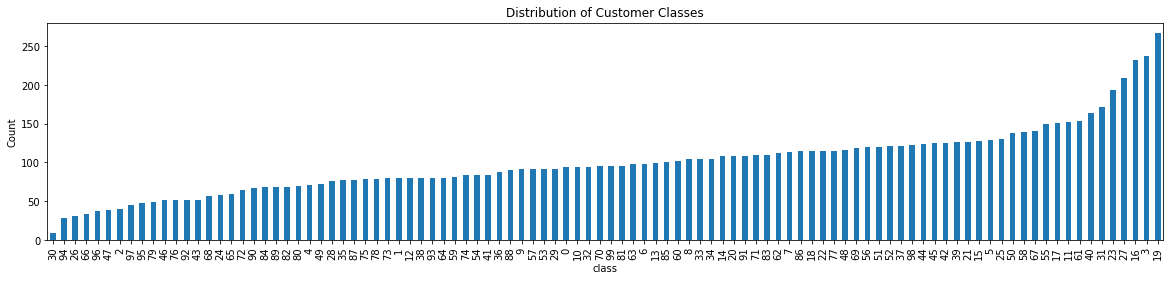

In [10]:
#d_train["class"].describe()
#Calculate and Plot number of Customers per Class
count_per_classes = d_train.groupby(['class'])['ID'].count().sort_values()
count_per_classes.plot(kind="bar", title="Distribution of Customer Classes", figsize=(20,4), ylabel="Count")

#Summarize the Number of each product in the dataset
sum_of_bought_prod = d_train.drop(columns=['ID', 'class']).sum(axis=0)
print(sum_of_bought_prod.sort_values())#.plot(kind="bar", title="Distribution of Bought Products", color="r")
sum_of_bought_prod.describe()
count_per_classes.describe()

## Dataset Description
The purchase dataset contains information about 10K customers and 600 binary attributes (product types), showing if a customer purchased the corresponding product or not. There are 100 classes in the target attribute. Each class represents a group of customers with similar purchase behaviour. The classification task is to predict the purchase behaviour of customers.

There is a big difference between the amount of customers in different classes ranging from class 30 with only 9 IDs contained in that class to class 19 with 267 IDs contained there.

We also encounter a big discrepancy looking at the products. There are products which are contained in almost every basket like number 16 with 9865 purchases and there are products like 0 with 0 purchases, which might be an error to be considered or product 476 with only 16 purchases. Maybe we will have to consider removing those outliers in order to improve prediction accuracy.

## Random Forest Classification

In [12]:
# Creating the Training and Test set from data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 21)

# Random Forest Classification
classifier = RandomForestClassifier(n_estimators = 1000, criterion = 'gini', random_state = 42)
classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=1000, random_state=42)

In [13]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

#print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.29      0.13      0.18        15
           1       1.00      0.33      0.50         9
           2       1.00      0.33      0.50        12
           3       0.22      0.95      0.35        39
           4       0.68      0.93      0.79        14
           5       0.44      0.20      0.28        20
           6       0.70      0.94      0.80        17
           7       0.63      0.48      0.55        25
           8       0.45      1.00      0.62        18
           9       0.75      0.14      0.24        21
          10       0.50      0.04      0.08        23
          11       0.42      0.37      0.39        27
          12       0.56      0.38      0.45        13
          13       0.53      0.69      0.60        13
          14       0.29      0.47      0.36        17
          15       0.71      0.40      0.51        25
          16       0.35      0.84      0.50        49
          17       0.35    

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## KNN

In [15]:
# Training the K-NN model on the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test, y_pred)
print(ac)

0.0275


## LDA

In [19]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=1)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

classifier = RandomForestClassifier(n_estimators = 1000, criterion = 'gini', random_state = 42)

classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' + str(accuracy_score(y_test, y_pred)))

[[1 0 0 ... 0 0 2]
 [0 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 2]
 [3 0 0 ... 0 1 0]
 [1 1 0 ... 0 0 1]]
Accuracy0.034
